In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

In [2]:
df = pd.read_csv('../../Data/classroom_actions.csv')
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [3]:
# Compute the observed difference in total days between the control and experiment groups
control_mean = df.query('group == "control"').total_days.mean()
experiment_mean = df.query('group == "experiment"').total_days.mean()
obs_diff = experiment_mean - control_mean
print('control mean:', control_mean)
print('experiment mean:', experiment_mean)
print('observed difference:', obs_diff)

control mean: 73.36899038461539
experiment mean: 74.6715935334873
observed difference: 1.3026031488719099


(array([   5.,   42.,  332., 1241., 2587., 2966., 1887.,  759.,  159.,
          22.]),
 array([-1.71018109e+00, -1.14129540e+00, -5.72409700e-01, -3.52400341e-03,
         5.65361693e-01,  1.13424739e+00,  1.70313309e+00,  2.27201878e+00,
         2.84090448e+00,  3.40979018e+00,  3.97867587e+00]),
 <BarContainer object of 10 artists>)

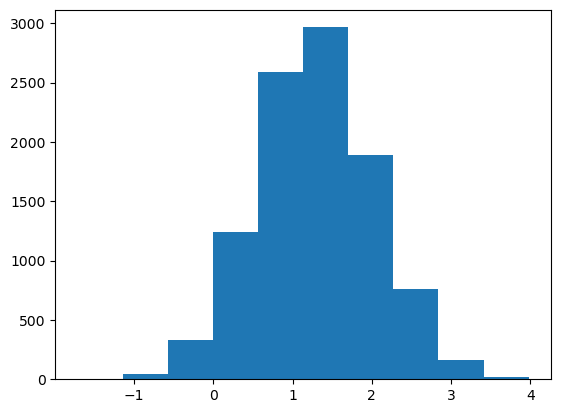

In [4]:
# Simulate sampling distribution for difference in proportions
diffs = []
for _ in range(10000):
    sample = df.sample(df.shape[0], replace=True)
    control_mean = sample.query('group == "control"').total_days.mean()
    experiment_mean = sample.query('group == "experiment"').total_days.mean()
    diffs.append(experiment_mean - control_mean)

# Convert to numpy array
diffs = np.array(diffs)

# Plot sampling distribution
plt.hist(diffs)

p-value: 0.0384


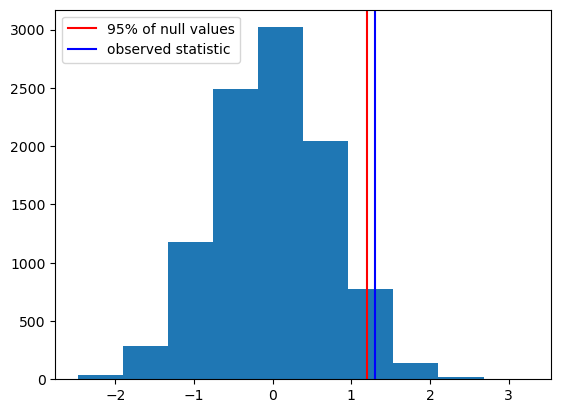

In [5]:
# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)
print('p-value:', (null_vals > obs_diff).mean())

# Plot the null distribution
plt.hist(null_vals)
plt.axvline(x=np.percentile(null_vals, 95), color='red')
plt.axvline(x=obs_diff, color='blue')
plt.legend(['95% of null values', 'observed statistic'])
plt.show()

With a p-value less than 0.05, it seems unlikely that our statistics is from the null. Thus, our finding is significant, and we reject the $H_0$. We, therefore, implement the change.

However, even if the increase in classroom time is statistically significant, engaging students for 1.3 more days in the classroom, when they average around 74 days in total, doesn't seem to indicate a large enough value to launch this change from a practical perspective for Audacity.